**Dataset:**
personality type data (Lab 2 - Personality Profile Type.csv)

**Objective:**
classify Personality type as one of the following **using RNNs**. <br>
['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

**Evaluation metric:**
Precision

### Import used libraries

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 1000)

### Load Dataset

In [380]:
df = pd.read_csv("/kaggle/input/mbti-type/mbti_1.csv")
df.head(10)

,type,posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f..."
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the las..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP, Your absolute admiration of me is refreshing. You're a great girlfriend an

### Data splitting

In [381]:
val_test_ratio = 0.2
X_train, X_val_test, y_train, y_val_test = train_test_split(df["posts"],
                                                    df["type"],
                                                    test_size=val_test_ratio,
                                                    stratify=df["type"],
                                                    random_state=42)

In [382]:
val_ratio = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_val_test,
                                                    y_val_test,
                                                    test_size=val_ratio,
                                                    stratify=y_val_test,
                                                    random_state=42)

In [383]:
print(len(df))
print(len(X_train))
print(len(X_val))
print(len(X_test))

8675
6940
867
868


### EDA on training data

- check NaNs

In [384]:
X_train.isna().sum()

0

- check duplicates

In [385]:
X_train.duplicated().sum()

0

In [386]:
train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
val = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

train.head(20)

,posts,type
0,"'this is actually exactly what i expected! :laughing: Introversion |||||||||| 40% |||||||||||||||| 70% Extroversion |||||||||||||||| 66% |||||||||| 36% Intuitive ||||||||||||||||||||...|||Now that you've had time to chill out, here comes the boundless insanity and awesomeness! (p.s. just noticed the weird tense/perspective of this sentence... it's being spoken by the universe to me...|||I'm going to post before i actually read the entire thread: Name a famous person you don't like. mel gibson What was the last thing you bought? groceries to make italian food Name a...|||i worked as a programmer all through high school, and then went to college for comp sci for about a year... eventually i decided it was something that i enjoyed, but not something i wanted to do all...|||I buy it whenever possible, and i adjust my cooking habits to accommodate what's local and organic and in season. I also cut corners in other parts of my budget so i don't have to sacrifice on the...|||for s...",INFP
1,"'Nope. Not now, not ever. I'm too busy with work, causes, and adrenaline-rush activities, and I'll do anything to make sure no one can keep up. Freedom! Forever!|||63913|||I did some thinking today and I decided to arrive at this conclusion. I never really understood negative feelings in the past, so I tried to repress them hoping that they would go away and I would...|||How often do you guys find yourself miscommunicating with others, or using your own lingo when talking with others? I remember DJArendee's post a while back where he said speaking for him is like...|||20. I would cut up worms to see what would happen. The heck kind of question is that!?!?!|||I think chessboxing would be a totally awesome sport for an ISTP.|||I was doing a lumbar puncture in the clinic when the earthquake rock and roll began - I just let go of the needle (already in the patient) and was like okay.... while waiting it out - then I got...|||Boy to Man So I actually never really loved my mom s...",ISTP
2,"'Yes peace is the absence of conflict - your INFP friend suxx hardd An ideal peace would be where everybody does exactly what I say. Then they would be totally happy & relaxed & content. So,...|||I'm just going to reallybriefly respond: 1. Yes, when it's in a formalized way, where we both recognize that we're debating. I think it also really helps if it's with an Intuitive - could probably...|||Yeah, I can't say I like Nietzsche either. I think what I mean when I say assert your will on the external environment is basically have goals, & make them reality. Bend reality to your will. On...|||Yes, it's true that the person who gives more also garners favor - that is actually exactly in keeping with what I'm saying. Giving can be just as much of an attempt at garnering power & favor....|||First, I *totally* relate to every feeling you describe here, specifically in the post-break-up fall out. I'm just going to vomit out my thoughts on this subject & your predicament specifically: ...",ENFJ
3,"'I apologize for the delayed response, but thank you for taking the time to share your experiences. It's helpful to hear that good boundaries come with time and not instantly. :) I'm so sorry to...|||I think that is exactly what I needed to hear. Boundaries, neediness, etc. are exactly what I'm working on right now, as well as developing a healthy self-image. It's nice to know that having those...|||Thank you for your input. Dealing with rejection, confrontation, etc. are definitely things that I'm thinking about right now. The thing is, I recognize that people can be very negative. I was raised...|||For any of you INFP counselors, therapists, etc. - what challenges have you experienced in this field? I'm strongly considering counseling for a career, and would love input from fellow INFPs on your...|||Yes, I do think I've found the right type. A logical INFP, perhaps, but an INFP nevertheless. For now, anyway. :D Thanks! :hugs:|||Interesting. I got ENFP. Obviously 

- show a representative sample of data texts to find out required preprocessing steps

# Investigating Length of sentences

In [387]:
ser = train['posts'].apply(lambda x: len(x.split()))
ser.describe()

count    6940.000000
mean     1225.821037
std       310.615971
min         4.000000
25%      1046.000000
50%      1277.000000
75%      1457.000000
max      1849.000000
Name: posts, dtype: float64

<Axes: >

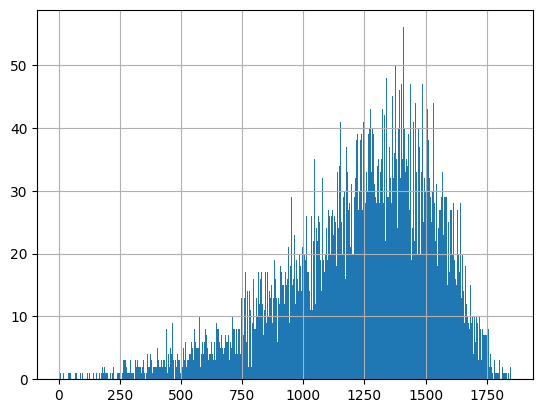

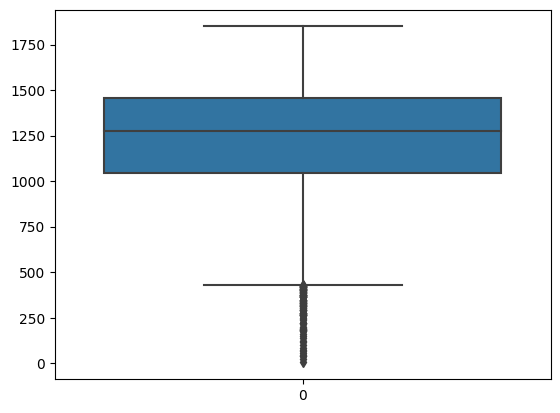

In [388]:
plt.figure()
ser.hist(bins=500)
plt.figure()
sns.boxplot(ser)

In [389]:
train['posts_length'] = train['posts'].apply(lambda x: len(x.split()))

- check dataset balancing

In [390]:
train["type"].value_counts()

type
INFP    1466
INFJ    1176
INTP    1043
INTJ     873
ENTP     548
ENFP     540
ISTP     270
ISFP     217
ENTJ     185
ISTJ     164
ENFJ     152
ISFJ     133
ESTP      71
ESFP      38
ESFJ      33
ESTJ      31
Name: count, dtype: int64

In [391]:
plt.figure(figsize=(12,8))
# sns.barplot(data=train["type"],y=train["type"].value_counts())

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# Cleaning : 

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

### Cleaning and Preprocessing

In [392]:
! pip install contractions
! pip install emoji

In [393]:
import nltk
import re
import emoji
import contractions
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [394]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stops = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [395]:
stops = stopwords.words('english')
stop_words = set(stops)

In [396]:
def clean_txt(text):
    text = text.lower()  # Lower
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove Links
    text = re.sub(r':[a-z_]+:', '', text)  # Remove emojis
    text = re.sub(r'[^\w\s]', ' ', text)  # Keep only alphanumeric characters and spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\|\|+\s*\d+%\s*\|\|+', '', text)   # Remove redundant percentage and bar lines
    text = re.sub(r'\d+', '', text)   # Remove digits
    text = re.sub(r'\b\w\b', '', text)    # Remove any floating single char
    text = text.strip()   # Stripping
    words = word_tokenize(text)
    cleaned_words = [word for word in words if word.lower() not in stop_words]    # Remove stopwors
#     cleaned_words = [lemmatizer.lemmatize(word, pos='v') for word in cleaned_words]   # Lemmatization
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text


In [397]:
for i in range(10) :
    text = train['posts'].iloc[i]
    print(text)
    print('\n')
    clean_text = clean_txt(text)
    print(clean_text)
    print("_" * 120)

'this is actually exactly what i expected!  :laughing:  Introversion |||||||||| 40% |||||||||||||||| 70% Extroversion |||||||||||||||| 66% |||||||||| 36% Intuitive ||||||||||||||||||||...|||Now that you've had time to chill out, here comes the boundless insanity and awesomeness!  (p.s. just noticed the weird tense/perspective of this sentence... it's being spoken by the universe to me...|||I'm going to post before i actually read the entire thread:  Name a famous person you don't like. mel gibson  What was the last thing you bought? groceries to make italian food  Name a...|||i worked as a programmer all through high school, and then went to college for comp sci for about a year...  eventually i decided it was something that i enjoyed, but not something i wanted to do all...|||I buy it whenever possible, and i adjust my cooking habits to accommodate what's local and organic and in season.  I also cut corners in other parts of my budget so i don't have to sacrifice on the...|||for sure,

In [398]:
from sklearn.preprocessing import LabelEncoder

def clean_all_and_merge(train, val, test):
  train['clean_posts'] = train['posts'].apply(clean_txt)
  val['clean_posts'] = val['posts'].apply(clean_txt)
  test['clean_posts'] = test['posts'].apply(clean_txt)

  train.drop(columns=['posts'], inplace=True)
  val.drop(columns=['posts'], inplace=True)
  test.drop(columns=['posts'], inplace=True)

  return train, val, test

In [399]:
train, val, test = clean_all_and_merge(train, val, test)

In [400]:
train.head()

,type,posts_length,clean_posts
0,INFP,1516,actually exactly expected introversion extroversion intuitive time chill comes boundless insanity awesomeness noticed weird tense perspective sentence spoken universe going post actually read entire thread name famous person like mel gibson last thing bought groceries make italian food name worked programmer high school went college comp sci year eventually decided something enjoyed something wanted buy whenever possible adjust cooking habits accommodate local organic season also cut corners parts budget sacrifice sure epic fail average last years day better one came mm agree need compassion plenty justice justice means people acting superior wrongs would sufficed also think justice feeling love intense unreasonable know never able share even express much exactly typed explanation thought would elaborate nearly identical wrote girl falling coming tonite cook dinner think feels absolutely delighted terrified mostly delighted though sort thing happens good intentioned people take wri...
1,ISTP,1219,nope ever busy work causes adrenaline rush activities anything make sure one keep freedom forever thinking today decided arrive conclusion never really understood negative feelings past tried repress hoping would go away would often guys find miscommunicating others using lingo talking others remember djarendee post back said speaking like would cut worms see would happen heck kind question think chessboxing would totally awesome sport istp lumbar puncture clinic earthquake rock roll began let go needle already patient like okay waiting got boy man actually never really loved mom speak workaholic worked dad office assistant also nurse taking lot shifts like saying love poor delivery gravelly voice help mean seriously pick one ladies want jack bauer usher saying love hay baybay yo fanta say like dancing playing guitar like art museums interact art hands staring away making weird comments style see hell unwanted center attention justin bieber lady gaga wannabe place bets general ques...
2,ENFJ,1166,yes peace absence conflict infp friend suxx hardd ideal peace would everybody exactly say would totally happy relaxed content going reallybriefly respond yes formalized way recognize debating think also really helps intuitive could probably yeah say like nietzsche either think mean say assert external environment basically goals make reality bend reality yes true person gives also garners favor actually exactly keeping saying giving much attempt garnering power favor first totally relate every feeling describe specifically post break fall going vomit thoughts subject predicament specifically know enfj estp relationships look like healthy talking romantic relationships brief thoughts estps keep brief chance conclude make preponderance evidence astral low show slow go town motown bloat clown walking street aquiesence mmm give quick response maybe go depth later largely flux stuff bad evil big jerk big ego necessarily trump enfj tmlt quit pretty much every job months feel good fit lol...
3,INFP,1373,apologize delayed response thank taking time share experiences helpful hear good boundaries come time instantly sorry think exactly needed hear boundaries neediness etc exactly working right well developing healthy self image nice know thank input dealing rejection confrontation etc definitely things thinking right thing recognize people negative raised infp counselors therapists etc challenges experienced field strongly considering counseling career would love input fellow infps yes think found right type logical infp perhaps infp nevertheless anyway thanks interesting got enfp obviously depends individual person could see interested infj yep sigh inbox full hmm yeah would frustrate wonder reframing would help looking new challenge something something worth time effort sorry feel boat many times hunt good job fits personality well mind ask industry gosh struggle right actually thinking blog post need write 

**You  are doing Great so far!**

# Feature Engineering on Labels : 

# Four Characters [1] [2] [3] [4]

# [1] `Mind` : Extrovert {E} - Introvert {I}

# [2] `Energy` : Intuitive {N} - Sensing {S}

# [3] `Nature` : Thinking {T} - Feeling {F}

# [4] `Tactics` : Judging {J} - Perceiving {P}

# **Binary Encoding :**

In [678]:
def personality(df):
  df['Mind'] = df['type'].map(lambda x: 'Extroverted'
                                    if x[0] == 'E' else 'Introverted')
  df['Energy'] = df['type'].map(lambda x: 'Intuitive'
                                      if x[1] == 'N' else 'Sensing')
  df['Nature'] = df['type'].map(lambda x: 'Thinking'
                                      if x[2] == 'T' else 'Feeling')
  df['Tactics'] = df['type'].map(lambda x: 'Judging'
                                      if x[3] == 'J' else 'Perceiving')

  df['E'] = df['type'].apply(lambda x: x[0] == 'I').astype('float')
  df['N'] = df['type'].apply(lambda x: x[1] == 'S').astype('float')
  df['T'] = df['type'].apply(lambda x: x[2] == 'F').astype('float')
  df['J'] = df['type'].apply(lambda x: x[3] == 'P').astype('float')

In [679]:
personality(train)
personality(val)
personality(test)

In [680]:
# train[['E', 'N', 'T', 'J']].sum()

In [670]:
train.head()

,type,posts_length,clean_posts,Mind,Energy,Nature,Tactics,E,N,T,J
0,INFP,1516,exactly expected introversion extroversion intuitive chill comes boundless insanity awesomeness noticed weird tense perspective sentence spoken universe going post read entire thread name famous person mel gibson last bought groceries make italian food name worked programmer high school went college comp sci year eventually decided enjoyed wanted buy whenever possible adjust cooking habits accommodate local organic season cut corners parts budget sacrifice sure epic fail average last years day better came mm agree need compassion plenty justice justice means acting superior wrongs sufficed justice feeling intense unreasonable able share even express exactly typed explanation thought elaborate nearly identical wrote girl falling coming tonite cook dinner feels absolutely delighted terrified mostly delighted though sort happens intentioned take written word literally thousands years mystical experience required understand pantheist maybe believe universe mind follow written religious...,Introverted,Intuitive,Feeling,Perceiving,0.5,0.0,1.0,0.666667
1,ISTP,1219,nope ever busy work causes adrenaline rush activities anything make sure keep freedom forever thinking today decided arrive conclusion understood negative feelings past tried repress hoping away often guys find miscommunicating others using lingo talking others remember djarendee post back said speaking cut worms happen heck kind question chessboxing totally awesome sport istp lumbar puncture clinic earthquake rock roll began let needle already patient okay waiting got boy man loved mom speak workaholic worked dad office assistant nurse taking shifts saying poor delivery gravelly voice help mean seriously pick ladies jack bauer usher saying hay baybay yo fanta dancing playing guitar art museums interact art hands staring away making weird comments style hell unwanted center attention justin bieber lady gaga wannabe place bets general question guys deal put hot seat unwillingly back child begged parents give another sibling attempted brainwash younger cousin thinking brother obvious...,Introverted,Sensing,Thinking,Perceiving,0.5,1.0,0.0,0.666667
2,ENFJ,1166,yes peace absence conflict infp friend suxx hardd ideal peace everybody exactly totally happy relaxed content going reallybriefly respond yes formalized recognize debating helps intuitive could probably yeah nietzsche either mean assert external environment basically goals make reality bend reality yes true person gives garners favor exactly keeping saying giving attempt garnering power favor first totally relate every feeling describe specifically post break fall going vomit thoughts subject predicament specifically enfj estp relationships look healthy talking romantic relationships brief thoughts estps keep brief chance conclude make preponderance evidence astral low show slow town motown bloat clown walking street aquiesence mmm give quick response maybe depth later largely flux stuff bad evil big jerk big ego necessarily trump enfj tmlt quit pretty every job months fit lol make trump great yeah let frankly totally admire son bitch mean bankruptcy life changing bankruptcies stop...,Extroverted,Intuitive,Feeling,Judging,0.0,0.0,1.0,0.000000
3,INFP,1373,apologize delayed response thank taking share experiences helpful hear boundaries come instantly sorry exactly needed hear boundaries neediness etc exactly working right developing healthy self image nice thank input dealing rejection confrontation etc definitely things thinking right recognize negative raised infp counselors therapists etc challenges experienced field strongly considering counseling career input fellow infps yes found right logical infp perhaps infp nevertheless anyway thanks interesting got enfp obviously depends individual person could interested infj yep sigh inbox full hmm yeah frustrate wonder reframing help looking new challenge worth effort sorry boat many times hunt job

# Check Longest sequence of word :

In [404]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

print(get_longest_text(train['clean_posts']))
print(get_longest_text(val['clean_posts']))
print(get_longest_text(test['clean_posts']))

914
848
881


<Axes: >

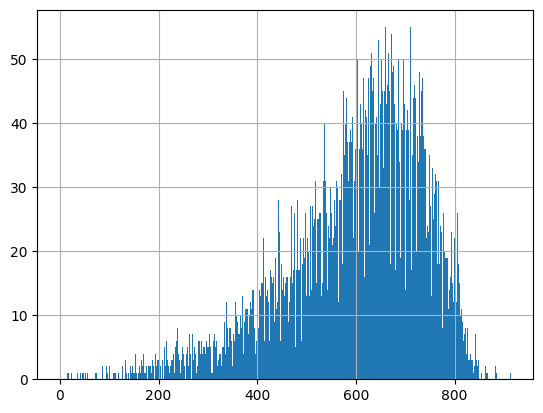

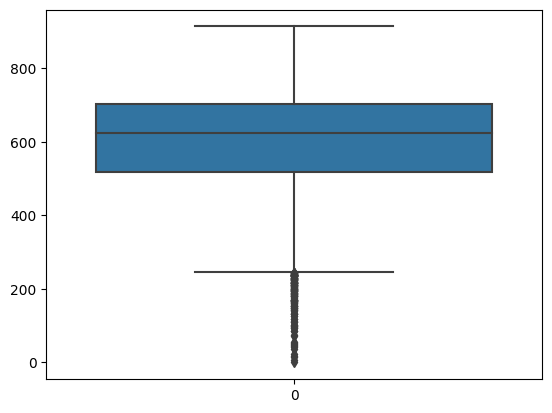

In [405]:
ser = train['clean_posts'].apply(lambda x: len(x.split()))
ser.describe()
plt.figure()
ser.hist(bins=500)
plt.figure()
sns.boxplot(ser)

# Tokenization :

In [406]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_seq_len = 900
word2idx = tf.keras.datasets.imdb.get_word_index()

tokenizer = Tokenizer(num_words=max_seq_len)
tokenizer.fit_on_texts(train['clean_posts'])
word_to_idx = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train['clean_posts'])
val_sequences = tokenizer.texts_to_sequences(val['clean_posts'])
test_sequences = tokenizer.texts_to_sequences(test['clean_posts'])

train_padded_sequences = pad_sequences(train_sequences, maxlen=max_seq_len)
val_padded_sequences = pad_sequences(val_sequences, maxlen=max_seq_len)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_seq_len)

# Just Show Count of some words in corpus :

In [407]:
word_to_idx = tokenizer.word_index  
word_counts = tokenizer.word_counts 

for word, count in list(word_counts.items())[:20]:
    print(f'Word: {word}, Count: {count}')

Word: actually, Count: 10536
Word: exactly, Count: 3631
Word: expected, Count: 422
Word: introversion, Count: 472
Word: extroversion, Count: 275
Word: intuitive, Count: 892
Word: time, Count: 22163
Word: chill, Count: 307
Word: comes, Count: 3390
Word: boundless, Count: 10
Word: insanity, Count: 83
Word: awesomeness, Count: 84
Word: noticed, Count: 1579
Word: weird, Count: 2513
Word: tense, Count: 86
Word: perspective, Count: 1000
Word: sentence, Count: 428
Word: spoken, Count: 239
Word: universe, Count: 663
Word: going, Count: 10182


# See Top 20 Frequent words in each class : 

In [408]:
top_words_per_class = {}
classes = train['type'].unique()
for class_label in classes:
    class_data = train[train['type'] == class_label]['clean_posts']
    tokenizer = Tokenizer()
    
    tokenizer.fit_on_texts(class_data)
    
    word_counts = tokenizer.word_counts
    
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_20_words = sorted_word_counts[:20]
    
    top_words_per_class[class_label] = top_20_words

for class_label, top_words in top_words_per_class.items():
    print(f"Class: {class_label}")
    for word, count in top_words:
        print(f"Word: {word}, Count: {count}")
    print("_" * 40)


Class: INFP
Word: like, Count: 12621
Word: think, Count: 9082
Word: people, Count: 8365
Word: really, Count: 6996
Word: know, Count: 6486
Word: one, Count: 6397
Word: infp, Count: 5818
Word: would, Count: 5676
Word: feel, Count: 5228
Word: get, Count: 5182
Word: time, Count: 4800
Word: love, Count: 4642
Word: much, Count: 4113
Word: well, Count: 3766
Word: good, Count: 3698
Word: things, Count: 3574
Word: want, Count: 3558
Word: way, Count: 3462
Word: something, Count: 3313
Word: say, Count: 3260
________________________________________
Class: ISTP
Word: like, Count: 2026
Word: people, Count: 1350
Word: think, Count: 1344
Word: get, Count: 1098
Word: one, Count: 1073
Word: would, Count: 1072
Word: know, Count: 1061
Word: really, Count: 1023
Word: istp, Count: 1016
Word: time, Count: 906
Word: well, Count: 716
Word: much, Count: 710
Word: something, Count: 710
Word: good, Count: 646
Word: things, Count: 611
Word: want, Count: 593
Word: way, Count: 580
Word: even, Count: 572
Word: say, C

# We see irrelevant words of class, redundant, so we will remove it , and then Show Again most frequent words :

In [409]:
words_to_remove = {"like", "think", "people", "one", "would", "really", "well", "love", "something", "always", "thing", "good", "feel", "actually", "never", "also", "go", "way", "see", "type", "much", "say", "get", "want", "lot", "time", "know"}

In [410]:
def remove_words(text, words_to_remove):
    return ' '.join([word for word in text.split() if word.lower() not in words_to_remove])

train['clean_posts'] = train['clean_posts'].apply(lambda x: remove_words(x, words_to_remove))

top_words_per_class = {}

classes = train['type'].unique()

for class_label in classes:
    class_data = train[train['type'] == class_label]['clean_posts']
    
    tokenizer = Tokenizer()
    
    tokenizer.fit_on_texts(class_data)
    
    word_to_idx = tokenizer.word_index
    word_counts = tokenizer.word_counts
    
    for word in words_to_remove:
        if word in word_to_idx:
            word_to_idx[word] = 0
    
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [(word, count) for word, count in sorted_word_counts if word not in words_to_remove][:10]
    
    top_words_per_class[class_label] = top_10_words

for class_label, top_words in top_words_per_class.items():
    print(f"Class: {class_label}")
    for word, count in top_words:
        print(f"Word: {word}, Count: {count}")
    print("_" * 40)


Class: INFP
Word: infp, Count: 5818
Word: things, Count: 3574
Word: life, Count: 3014
Word: even, Count: 2944
Word: someone, Count: 2826
Word: though, Count: 2619
Word: make, Count: 2550
Word: could, Count: 2530
Word: find, Count: 2365
Word: friends, Count: 2295
________________________________________
Class: ISTP
Word: istp, Count: 1016
Word: things, Count: 611
Word: even, Count: 572
Word: someone, Count: 495
Word: pretty, Count: 483
Word: though, Count: 475
Word: make, Count: 461
Word: got, Count: 451
Word: right, Count: 402
Word: could, Count: 397
________________________________________
Class: ENFJ
Word: enfj, Count: 708
Word: things, Count: 375
Word: someone, Count: 348
Word: lol, Count: 311
Word: make, Count: 306
Word: friends, Count: 300
Word: could, Count: 290
Word: even, Count: 280
Word: right, Count: 280
Word: person, Count: 277
________________________________________
Class: ENFP
Word: enfp, Count: 2607
Word: things, Count: 1369
Word: even, Count: 1050
Word: could, Count: 10

# Investigate Length Again after removing  :

<Axes: >

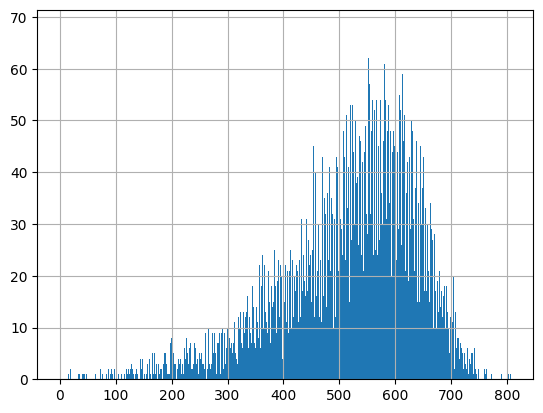

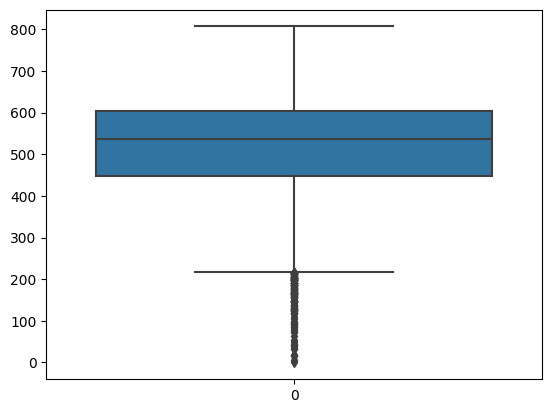

In [411]:
ser = train['clean_posts'].apply(lambda x: len(x.split()))
ser.describe()
plt.figure()
ser.hist(bins=500)
plt.figure()
sns.boxplot(ser)

# Clean also validation and test  :

In [412]:
val['clean_posts'] = val['clean_posts'].apply(lambda x: remove_words(x, words_to_remove))
test['clean_posts'] = test['clean_posts'].apply(lambda x: remove_words(x, words_to_remove))

# Get Longest Text exist :

In [413]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

print(get_longest_text(train['clean_posts']))
print(get_longest_text(val['clean_posts']))
print(get_longest_text(test['clean_posts']))

807
734
769


In [414]:
max_seq_len = 700
train_padded_sequences = pad_sequences(train_padded_sequences, maxlen=max_seq_len)
val_padded_sequences = pad_sequences(val_padded_sequences, maxlen=max_seq_len)
test_padded_sequences = pad_sequences(test_padded_sequences, maxlen=max_seq_len)


# What about filling every empty index (0) with class name index if it exist {and it is already exist in corpus} :

In [415]:
# class_names = list(train['type'].unique())
# class_name_to_id = {class_name.lower(): word_to_idx[class_name.lower()] for class_name in class_names if class_name.lower() in word_to_idx}
# class_name_to_id

In [416]:
# for i, (sentence, class_name) in enumerate(zip(train['clean_posts'], train['type'])):
#     class_id = class_name_to_id.get(class_name.lower(), None)
#     if class_id is not None and class_name.lower() in sentence.lower():
#         for j in range(len(train_padded_sequences[i])):
#             if train_padded_sequences[i][j] == 0:
#                 train_padded_sequences[i][j] = class_id
                

In [417]:
# for i, (sentence, class_name) in enumerate(zip(val['clean_posts'], train['type'])):
#     class_id = class_name_to_id.get(class_name.lower(), None)
#     if class_id is not None and class_name.lower() in sentence.lower():
#         for j in range(len(val_padded_sequences[i])):
#             if val_padded_sequences[i][j] == 0:
#                 val_padded_sequences[i][j] = class_id

In [418]:
# for i, (sentence, class_name) in enumerate(zip(test['clean_posts'], train['type'])):
#     class_id = class_name_to_id.get(class_name.lower(), None)
#     if class_id is not None and class_name.lower() in sentence.lower():
#         for j in range(len(val_padded_sequences[i])):
#             if test_padded_sequences[i][j] == 0:
#                 test_padded_sequences[i][j] = class_id

In [419]:
train_padded_sequences[0].shape

(700,)

In [681]:
y_train = train[['E', 'N', 'T', 'J']]
y_val = val[['E', 'N', 'T', 'J']]
y_test = test[['E', 'N', 'T', 'J']]

In [598]:
y_train.head()

,E,N,T,J
0,1.0,0.0,1.0,1.0
1,1.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0


In [599]:
print(y_val.shape)
print(y_train.shape)


(867, 4)
(6940, 4)


In [639]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

class LossMetric(tf.keras.metrics.Metric):
    def __init__(self, name='loss', **kwargs):
        super(LossMetric, self).__init__(name=name, **kwargs)
        self.loss_tracker = self.add_weight(name='loss', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        self.loss_tracker.assign(tf.reduce_mean(loss))

    def result(self):
        return self.loss_tracker

    def reset_states(self):
        self.loss_tracker.assign(0.0)


In [632]:
num_classes = y_train.shape[1]
num_classes

4

In [698]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]


# Option 1: Use a SimpleRNN cell
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 128),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid', kernel_regularizer=l2(0.01))
])


# Option 2: Use a LSTM cell
# model2 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])

# Option 3: Use a GRU cell
# model3 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.GRUCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [701]:
history1 = model1.fit(train_padded_sequences, y_train, epochs=15, batch_size=256,
                    validation_data=(val_padded_sequences, y_val),
                    validation_steps=1)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - categorical_accuracy: 0.5858 - loss: 0.2584 - precision_85: 0.8824 - val_categorical_accuracy: 0.4453 - val_loss: 1.4024 - val_precision_85: 0.6191
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - categorical_accuracy: 0.6180 - loss: 0.2409 - precision_85: 0.8944 - val_categorical_accuracy: 0.4648 - val_loss: 1.3337 - val_precision_85: 0.6710
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - categorical_accuracy: 0.6076 - loss: 0.2289 - precision_85: 0.9217 - val_categorical_accuracy: 0.5000 - val_loss: 1.6789 - val_precision_85: 0.6267
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - categorical_accuracy: 0.5965 - loss: 0.2216 - precision_85: 0.9220 - val_categorical_accuracy: 0.4141 - val_loss: 1.9367 - val_precision_85: 0.6141
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - categorical_accuracy: 0.6161 - loss: 0.1477 - precision_85: 0.9268 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_precisio

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - categorical_accuracy: 0.5963 - loss: 0.1984 - precision_85: 0.9356 - val_categorical_accuracy: 0.4297 - val_loss: 1.8191 - val_precision_85: 0.6351
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - categorical_accuracy: 0.5979 - loss: 0.1868 - precision_85: 0.9422 - val_categorical_accuracy: 0.4648 - val_loss: 1.6043 - val_precision_85: 0.6827
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - categorical_accuracy: 0.5849 - loss: 0.2037 - precision_85: 0.9319 - val_categorical_accuracy: 0.5156 - val_loss: 1.9347 - val_precision_85: 0.6188
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - categorical_accuracy: 0.6208 - loss: 0.2074 - precision_85: 0.9351 - val_categorical_accuracy: 0.4747 - val_loss: 2.1205 - val_precision_85: 0.6343
Epoch 10/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - categorical_accuracy: 0.6101 - loss: 0.1117 - precision_85: 0.9481 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_precision_85: 0.00

In [688]:
y_test.head(10)

,E,N,T,J
0,1.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0
5,0.0,0.0,1.0,1.0
6,0.0,0.0,1.0,1.0
7,1.0,0.0,0.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,0.0,0.0,1.0


In [702]:
pred = model1.predict(test_padded_sequences[0:10])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[9.9299908e-01, 2.2429053e-06, 9.9836427e-01, 8.0121001e-03],
       [9.8750007e-01, 8.9967994e-05, 2.0677419e-01, 4.2034756e-02],
       [3.8950250e-01, 6.3112700e-01, 3.0770560e-03, 2.4201140e-01],
       [9.9739039e-01, 3.6589121e-05, 1.1998976e-02, 1.5009426e-01],
       [9.7362882e-01, 1.5060588e-04, 1.4408344e-01, 3.1386614e-02],
       [9.9864143e-01, 1.2201947e-05, 5.1393825e-01, 8.6296253e-02],
       [3.8646769e-02, 5.8345550e-01, 3.4402704e-01, 7.1169472e-01],
       [9.4494355e-01, 1.2506036e-05, 9.8404413e-01, 9.5817186e-03],
       [4.3968089e-02, 7.5480974e-01, 8.0213988e-01, 5.5114532e-01],
       [9.9999821e-01, 4.5087013e-06, 5.9976115e-05, 9.9335349e-01]],
      dtype=float32)

In [711]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]


# Option 1: Use a SimpleRNN cell
# model1 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


# Option 2: Use a LSTM cell
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 128),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid', kernel_regularizer=l2(0.001))
])
# Option 3: Use a GRU cell
# model3 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.GRUCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [712]:
history2 = model2.fit(train_padded_sequences, y_train, epochs=30, batch_size=128,
                    validation_data=(val_padded_sequences, y_val),
                    validation_steps=1)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - categorical_accuracy: 0.7473 - loss: 0.6048 - precision_89: 0.6959 - val_categorical_accuracy: 0.7734 - val_loss: 0.5915 - val_precision_89: 0.6328
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - categorical_accuracy: 0.8033 - loss: 0.5697 - precision_89: 0.6425 - val_categorical_accuracy: 0.7500 - val_loss: 0.5670 - val_precision_89: 0.6227
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - categorical_accuracy: 0.7872 - loss: 0.5492 - precision_89: 0.6553 - val_categorical_accuracy: 0.2969 - val_loss: 0.6400 - val_precision_89: 0.6667
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - categorical_accuracy: 0.6754 - loss: 0.5219 - precision_89: 0.7118 - val_categorical_accuracy: 0.6094 - val_loss: 0.5049 - val_precision_89: 0.7594
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - categorical_accuracy: 0.7414 - loss: 0.5289 - precision_89: 0.7206 - val_categorical_accuracy: 0.7422 - val_loss: 0.5900 - val_precision_89: 0.

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - categorical_accuracy: 0.6489 - loss: 0.4857 - precision_89: 0.7256 - val_categorical_accuracy: 0.5000 - val_loss: 0.5589 - val_precision_89: 0.7186
Epoch 10/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - categorical_accuracy: 0.5639 - loss: 0.5511 - precision_89: 0.7193 - val_categorical_accuracy: 0.7344 - val_loss: 0.5754 - val_precision_89: 0.6464
Epoch 11/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - categorical_accuracy: 0.7219 - loss: 0.5333 - precision_89: 0.6777 - val_categorical_accuracy: 0.5000 - val_loss: 0.5846 - val_precision_89: 0.6873
Epoch 12/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - categorical_accuracy: 0.6234 - loss: 0.5304 - precision_89: 0.7085 - val_categorical_accuracy: 0.6172 - val_loss: 0.5223 - val_precision_89: 0.7072
Epoch 13/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - categorical_accuracy: 0.7397 - loss: 0.5021 - precision_89: 0.7065 - val_categorical_accuracy: 0.7422 - val_loss: 0.5455 - val_precision_89: 0.7038
Ep

In [713]:
y_test.head(10)

,E,N,T,J
0,1.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0
5,0.0,0.0,1.0,1.0
6,0.0,0.0,1.0,1.0
7,1.0,0.0,0.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,0.0,0.0,1.0


In [714]:
pred = model2.predict(test_padded_sequences[0:10])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[9.57669020e-01, 5.09770393e-01, 9.24896717e-01, 3.36942226e-01],
       [6.99973583e-01, 3.04026484e-01, 9.70618784e-01, 3.76757652e-01],
       [9.89145875e-01, 1.27769157e-01, 9.77228522e-01, 2.29313731e-01],
       [4.38962318e-02, 4.65150597e-03, 1.96643360e-02, 8.43119740e-01],
       [7.89988101e-01, 8.21260929e-01, 1.85613587e-01, 6.70114815e-01],
       [1.15879886e-01, 4.78653383e-05, 1.22063160e-01, 9.10070956e-01],
       [4.67138812e-02, 3.36873680e-02, 6.10074215e-02, 8.19194436e-01],
       [9.04317975e-01, 3.06316512e-03, 7.70785846e-03, 7.01162815e-01],
       [9.83724117e-01, 4.86620655e-03, 8.78117204e-01, 7.38769770e-01],
       [9.91693676e-01, 1.48770213e-03, 9.85605270e-03, 5.86693406e-01]],
      dtype=float32)

In [718]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]


# Option 1: Use a SimpleRNN cell
# model1 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


# Option 2: Use a LSTM cell
# model2 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])

# Option 3: Use a GRU cell
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [715]:
history3 = model3.fit(train_padded_sequences, y_train, epochs=30, batch_size=128,
                    validation_data=(val_padded_sequences, y_val),
                    validation_steps=1)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - categorical_accuracy: 0.1037 - loss: 0.6350 - precision_88: 0.6254 - val_categorical_accuracy: 0.7734 - val_loss: 0.5955 - val_precision_88: 0.6328
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - categorical_accuracy: 0.8080 - loss: 0.5733 - precision_88: 0.6425 - val_categorical_accuracy: 0.7578 - val_loss: 0.5759 - val_precision_88: 0.6198
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - categorical_accuracy: 0.7842 - loss: 0.5597 - precision_88: 0.6510 - val_categorical_accuracy: 0.7969 - val_loss: 0.5746 - val_precision_88: 0.6667
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - categorical_accuracy: 0.7511 - loss: 0.5451 - precision_88: 0.6801 - val_categorical_accuracy: 0.7031 - val_loss: 0.5461 - val_precision_88: 0.7235
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - categorical_accuracy: 0.6941 - loss: 0.5170 - precision_88: 0.7105 - val_categorical_accuracy: 0.4609 - val_loss: 0.5243 - val_precision_88: 0.

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - categorical_accuracy: 0.5180 - loss: 0.4394 - precision_88: 0.7558 - val_categorical_accuracy: 0.4531 - val_loss: 0.4868 - val_precision_88: 0.7336
Epoch 10/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - categorical_accuracy: 0.4702 - loss: 0.4260 - precision_88: 0.7709 - val_categorical_accuracy: 0.5312 - val_loss: 0.4804 - val_precision_88: 0.7162
Epoch 11/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - categorical_accuracy: 0.4920 - loss: 0.4147 - precision_88: 0.7848 - val_categorical_accuracy: 0.4297 - val_loss: 0.5367 - val_precision_88: 0.7063
Epoch 12/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - categorical_accuracy: 0.5045 - loss: 0.4025 - precision_88: 0.7990 - val_categorical_accuracy: 0.3594 - val_loss: 0.4846 - val_precision_88: 0.7662
Epoch 13/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - categorical_accuracy: 0.4929 - loss: 0.3849 - precision_88: 0.8098 - val_categorical_accuracy: 0.3672 - val_loss: 0.4581 - val_precision_88: 0.7880
Ep

In [716]:
y_test.head(10)

,E,N,T,J
0,1.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0
5,0.0,0.0,1.0,1.0
6,0.0,0.0,1.0,1.0
7,1.0,0.0,0.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,0.0,0.0,1.0


In [717]:
pred = model3.predict(test_padded_sequences[0:10])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


array([[8.4763074e-01, 9.3323357e-02, 9.9856615e-01, 7.4604869e-01],
       [9.7477210e-01, 1.6270500e-02, 9.9750996e-01, 9.8376048e-01],
       [9.9941534e-01, 8.4862057e-03, 9.9921250e-01, 4.2157951e-01],
       [3.6168616e-02, 2.5057157e-03, 3.1656728e-04, 6.0235357e-01],
       [8.6967432e-01, 1.8273386e-01, 9.0855849e-01, 1.6422963e-02],
       [2.7307497e-02, 6.5282010e-02, 8.3162504e-01, 9.5816928e-01],
       [1.2158505e-01, 2.3630412e-02, 9.6191859e-01, 9.2969441e-01],
       [9.0463746e-01, 3.1746835e-02, 4.2336461e-07, 9.4358289e-01],
       [1.3751734e-02, 4.0034883e-02, 4.1680052e-03, 8.6365461e-01],
       [9.8452747e-01, 2.3419722e-03, 4.0674091e-05, 9.9742657e-01]],
      dtype=float32)

In [719]:
np.round(pred)

array([[1., 0., 1., 1.],
       [1., 0., 1., 1.],
       [1., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 1.]], dtype=float32)

#### Evaluation

**Evaluation metric:**
Precision

In [137]:
y_test.head(10)

,E,N,T,J
0,0,1,0,0
1,0,1,0,1
2,0,1,0,0
3,1,1,1,0
4,0,0,0,1
5,1,1,0,0
6,1,1,0,0
7,0,1,1,0
8,0,0,0,0
9,0,1,1,0


### Enhancement

### Conclusion and final results


#### Done!